<a href="https://colab.research.google.com/github/XavierHiguera/Actividad_1/blob/main/Actividad1_A01204670.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 1
José Xavier Higuera Alanis

A01204670

##1. Crear un nuevo repositorio nuevo con el nombre: Actividad 1

##2. Agregar el archivo: Listing.csv.gz de México ingresar a: http://insideairbnb.com/get-the-data/

In [31]:
#Importamos las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [32]:
#Leemos el archivo de Listing.csv.gz de México que descargamos desde
#http://insideairbnb.com/get-the-data/ y subimos a este documento.
dfmx = pd.read_csv('listings.csv')
dfmx

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20220922013610,2022-09-22,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,783480,https://www.airbnb.com/rooms/783480,20220922013610,2022-09-22,city scrape,"Area Sta.Fe,IberoABC Hospital Rooms",<b>The space</b><br />Two beautifully furnishe...,The neighborhood is very quiet. There are smal...,https://a0.muscache.com/pictures/12600230/eec8...,4129056,...,4.93,4.70,4.85,NaN,t,2,0,2,0,0.26
2,796477,https://www.airbnb.com/rooms/796477,20220922013610,2022-09-23,city scrape,Classic but Modern Apartment in Condesa,Spacious and comfortable room on historic buil...,Condesa is surrounded by important museums and...,https://a0.muscache.com/pictures/58251607/70e9...,4195771,...,4.91,4.96,4.71,NaN,f,1,0,1,0,1.52
3,44616,https://www.airbnb.com/rooms/44616,20220922013610,2022-09-23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.75,4.98,4.47,NaN,f,12,3,2,0,0.44
4,817291,https://www.airbnb.com/rooms/817291,20220922013610,2022-09-22,city scrape,Live Mexico City Like a Small Town,"Beautiful and cozy apartment in Mexico City, w...",Please check the guidebook. We have posted man...,https://a0.muscache.com/pictures/556d81f5-5aef...,4017148,...,4.95,4.63,4.78,NaN,f,1,1,0,0,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22943,697457011724147393,https://www.airbnb.com/rooms/697457011724147393,20220922013610,2022-09-22,city scrape,Depa seguro a 10 mns en auto del AICM,Fines de semana suenan los antros.<br /><br />...,"Tres santos, Oxxo, Banorte, servicios en gener...",https://a0.muscache.com/pictures/miso/Hosting-...,226551717,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
22944,22175774,https://www.airbnb.com/rooms/22175774,20220922013610,2022-09-22,city scrape,Comoda habitación con vista e iluminación natural,Comoda habitación con excelente iluminación na...,La colonia esta situada en la zona poniente de...,https://a0.muscache.com/pictures/49c556f0-bb75...,46746429,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.06
22945,1911707,https://www.airbnb.com/rooms/1911707,20220922013610,2022-09-22,city scrape,Beautiful house gardens & terraces,Once home to a native from Yucatan. Wonderfull...,NaN,https://a0.muscache.com/pictures/51159996/1811...,641535,...,4.93,4.81,4.81,NaN,f,1,1,0,0,0.27
22946,45285491,https://www.airbnb.com/rooms/45285491,20220922013610,2022-09-22,city scrape,Amplio Dpto a 5 min de Av P. de las Palmas/Par...,"El departamento es de dos plantas, en el prime...",NaN,https://a0.muscache.com/pictures/d5bdf63b-1b4f...,365965170,...,4.29,4.82,4.47,NaN,t,8,6,2,0,2.90


##3. Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers

In [33]:
#Observamos el total de columnas, su número identificador, sus nulos y su 
#tipo para posterior análisis y limpieza.
dfmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22948 non-null  int64  
 1   listing_url                                   22948 non-null  object 
 2   scrape_id                                     22948 non-null  int64  
 3   last_scraped                                  22948 non-null  object 
 4   source                                        22948 non-null  object 
 5   name                                          22945 non-null  object 
 6   description                                   21921 non-null  object 
 7   neighborhood_overview                         14532 non-null  object 
 8   picture_url                                   22948 non-null  object 
 9   host_id                                       22948 non-null 

In [34]:
#Generamos una base de datos pequeña con las caracteristicas de interés
#para nuestro análisis.
df = dfmx[['room_type','number_of_reviews','host_acceptance_rate','price',
           'availability_365','review_scores_rating',
           'review_scores_cleanliness','review_scores_communication']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    22948 non-null  object 
 1   number_of_reviews            22948 non-null  int64  
 2   host_acceptance_rate         20483 non-null  object 
 3   price                        22948 non-null  object 
 4   availability_365             22948 non-null  int64  
 5   review_scores_rating         18881 non-null  float64
 6   review_scores_cleanliness    18787 non-null  float64
 7   review_scores_communication  18787 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.4+ MB


In [35]:
#Usamos esta linea para visualizar cómo son los nulos
df[df['host_acceptance_rate'].isnull()]

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,0,NaN,"$4,001.00",363,NaN,NaN,NaN
15,Entire home/apt,25,NaN,$600.00,233,4.75,4.88,4.96
16,Private room,0,NaN,"$1,360.00",88,NaN,NaN,NaN
20,Private room,8,NaN,$460.00,269,4.75,5.00,5.00
43,Entire home/apt,0,NaN,"$1,997.00",0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22916,Private room,0,NaN,$303.00,177,NaN,NaN,NaN
22933,Private room,0,NaN,$490.00,363,NaN,NaN,NaN
22937,Private room,0,NaN,$500.00,365,NaN,NaN,NaN
22943,Shared room,0,NaN,$450.00,365,NaN,NaN,NaN


In [36]:
#Usamos el método "BFILL" para rellenar nuestros datos nulos y observamos el resultado
df = df.fillna(method='bfill')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    22948 non-null  object 
 1   number_of_reviews            22948 non-null  int64  
 2   host_acceptance_rate         22948 non-null  object 
 3   price                        22948 non-null  object 
 4   availability_365             22948 non-null  int64  
 5   review_scores_rating         22948 non-null  float64
 6   review_scores_cleanliness    22948 non-null  float64
 7   review_scores_communication  22948 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.4+ MB


In [37]:
#Observamos que ya no se presenta nigún valor nulo
#Convertimos los datos de 'acceptance_rate' de tipo objeto a tipo flotante
df['host_acceptance_rate'] = [x.replace("%","") for x in df['host_acceptance_rate']]
df['host_acceptance_rate'] = [float(x) for x in df['host_acceptance_rate']]
df['host_acceptance_rate']

0        100.0
1        100.0
2         67.0
3         79.0
4        100.0
         ...  
22943    100.0
22944    100.0
22945    100.0
22946     99.0
22947     99.0
Name: host_acceptance_rate, Length: 22948, dtype: float64

In [38]:
#Convertimos los datos de 'price' de tipo objeto a tipo flotante
df['price'] = [x.replace("$","") for x in df['price']]
df['price'] = [x.replace(",","") for x in df['price']]
df['price'] = [float(x) for x in df['price']]
df['price']

0         4001.0
1          500.0
2          599.0
3        18000.0
4          740.0
          ...   
22943      450.0
22944      750.0
22945     5041.0
22946     1100.0
22947      959.0
Name: price, Length: 22948, dtype: float64

In [39]:
#Analisamos nuestros datos para eliminar o no los outliers.
df.describe()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
count,22948.000000,22948.000000,22948.000000,22948.000000,22948.000000,22948.000000,22948.000000
mean,32.446706,89.386788,1536.946255,243.796714,4.699714,4.745159,4.811350
std,57.862531,23.396142,11758.611103,123.178864,0.600387,0.491111,0.472533
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,93.000000,500.000000,140.000000,4.670000,4.710000,4.820000
50%,10.000000,99.000000,899.000000,300.000000,4.850000,4.880000,4.950000
75%,37.000000,100.000000,1490.000000,353.000000,5.000000,5.000000,5.000000
max,932.000000,100.000000,999998.000000,365.000000,5.000000,5.000000,5.000000


In [40]:
#Vemos que las variables "number_of_reviews" y "price" tienen outliers para su máximo.
#También vemos que las variables restantes tienen outliers en sus minimos.
#Para el primer caso mandamos los outliers al valor en el perentil 90 y para el segundo en el 10.
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df

percentile10=y.quantile(0.1) #P10
percentile90=y.quantile(0.9) #P90

print(percentile10,percentile90)

number_of_reviews                0.00
host_acceptance_rate            63.00
price                          321.70
availability_365                51.00
review_scores_rating             4.40
review_scores_cleanliness        4.42
review_scores_communication      4.57
Name: 0.1, dtype: float64 number_of_reviews                92.0
host_acceptance_rate            100.0
price                          2500.0
availability_365                364.0
review_scores_rating              5.0
review_scores_cleanliness         5.0
review_scores_communication       5.0
Name: 0.9, dtype: float64


In [41]:
#Creamos nuestras funciones para limpiar en max y min
def ma(n,m):
  l =[]
  for x in df[n]:
    if x >= m:
      l.append(m)
    else:
      l.append(x)
  return l

def mi(n,m):
  l =[]
  for x in df[n]:
    if x <= m:
      l.append(m)
    else:
      l.append(x)
  return l

In [42]:
#Corremos nuestras funciones para cada columna de interés
df['number_of_reviews'] = ma('number_of_reviews',92)
df['host_acceptance_rate'] = mi('host_acceptance_rate',63)
df['price'] = mi('price',321.70)
df['price'] = ma('price',2500)
df['availability_365'] = mi('availability_365',51)
df['review_scores_rating'] = mi('review_scores_rating',4.4)
df['review_scores_cleanliness'] = mi('review_scores_cleanliness',4.42)
df['review_scores_communication'] = mi('review_scores_communication',4.57)

In [43]:
#Observamo ahora los cambios en nuestro df para los maximos y minimos.
df.describe()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
count,22948.000000,22948.000000,22948.000000,22948.000000,22948.000000,22948.000000,22948.000000
mean,24.400427,93.057391,1082.795066,247.393629,4.798055,4.820159,4.885619
std,30.431277,12.093172,693.231927,116.669693,0.200197,0.193584,0.144146
min,0.000000,63.000000,321.700000,51.000000,4.400000,4.420000,4.570000
25%,1.000000,93.000000,500.000000,140.000000,4.670000,4.710000,4.820000
50%,10.000000,99.000000,899.000000,300.000000,4.850000,4.880000,4.950000
75%,37.000000,100.000000,1490.000000,353.000000,5.000000,5.000000,5.000000
max,92.000000,100.000000,2500.000000,365.000000,5.000000,5.000000,5.000000


##4. Analizar la correlación que existe en cada tipo de habitación respecto a las variables siguientes, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

In [44]:
#Revisamos los tipos distintos de cuarto que existen en nuestro DF
dfmx['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [45]:
#Creamos nuestros 4 distintos DFs por cada tipo de cuarto
df1 = df[df['room_type'] == 'Entire home/apt']
df2 = df[df['room_type'] == 'Private room']
df3 = df[df['room_type'] == 'Hotel room']
df4 = df[df['room_type'] == 'Shared room']

In [46]:
def correlaciones(DF):
  #Generamos las correlaciones del DF que nos servirán más adelante
  Corr_Factors=DF.corr()
  
  #Imprimimos las distribuciones de los pares de datos
  fig=plt.figure(figsize=(20, 10))
  ax1=fig.add_subplot(3,3,1)
  ax2=fig.add_subplot(3,3,2)
  ax3=fig.add_subplot(3,3,3)
  ax4=fig.add_subplot(3,3,4)
  ax5=fig.add_subplot(3,3,5)
  ax6=fig.add_subplot(3,3,6)
  ax7=fig.add_subplot(3,3,(7,9))
  
  ax1.scatter(DF['number_of_reviews'],DF['host_acceptance_rate'],c='red',s=5,alpha=.5)
  ax2.scatter(DF['number_of_reviews'],DF['price'],c='red',s=5,alpha=.5)
  ax3.scatter(DF['number_of_reviews'],DF['availability_365'],c='blue',s=5,alpha=.5)
  ax4.scatter(DF['number_of_reviews'],DF['review_scores_rating'],c='brown',s=5,alpha=.5)
  ax5.scatter(DF['number_of_reviews'],DF['review_scores_cleanliness'],c='green',s=5,alpha=.5)
  ax6.scatter(DF['number_of_reviews'],DF['review_scores_communication'],c='black',s=5,alpha=.5)
  fig.show()

  #Observamos el HeatMap con las correlaciones y su fuerza
  Heat_Map= sns.heatmap(Corr_Factors, cmap = 'YlGnBu', annot=True, fmt=".2f")  
  print(Heat_Map)
  return Corr_Factors

PARA EL TIPO DE HABITACIÓN Entire home/apt OBSERVAMOS SUS GRÁFICAS:
AxesSubplot(0.125,0.125;0.62x0.222059)


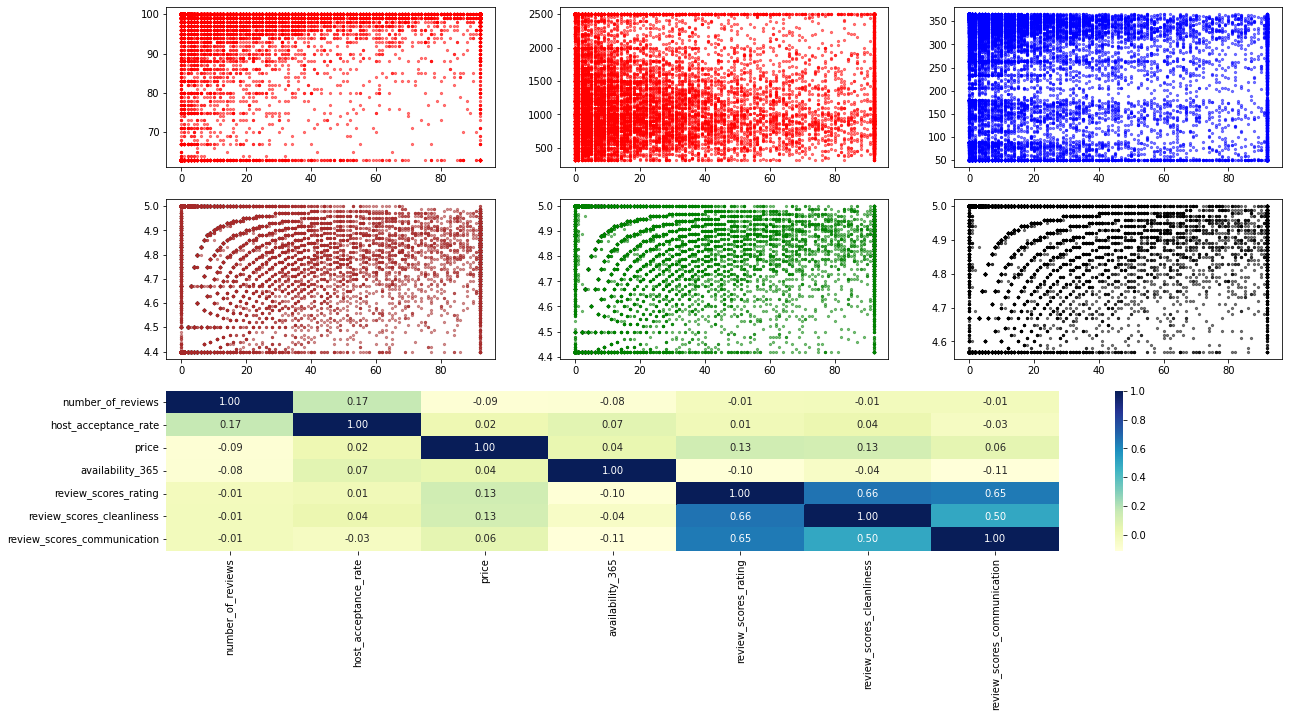

In [47]:
#Observamos las correlaciones para el primer DF
print("PARA EL TIPO DE HABITACIÓN Entire home/apt OBSERVAMOS SUS GRÁFICAS:")
corrdf1 = correlaciones(df1)

PARA EL TIPO DE HABITACIÓN Private room OBSERVAMOS SUS GRÁFICAS:
AxesSubplot(0.125,0.125;0.62x0.222059)


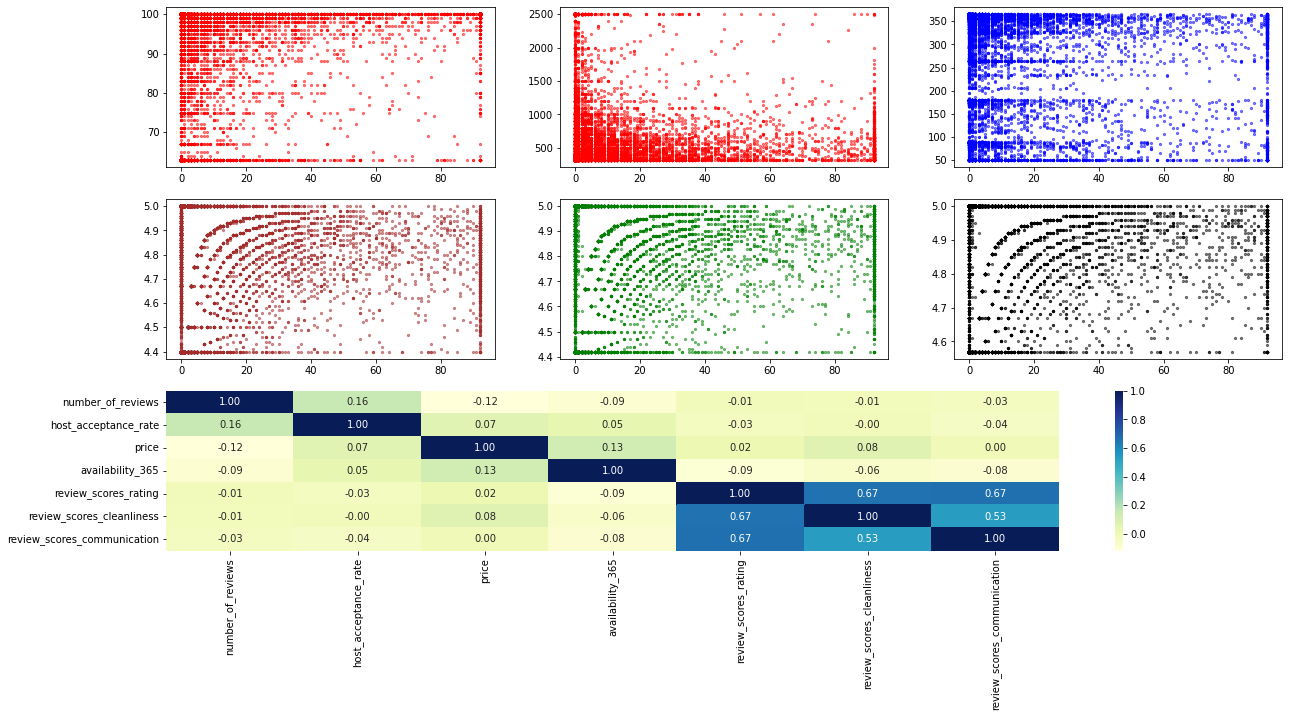

In [48]:
#Observamos las correlaciones para el segundo DF
print("PARA EL TIPO DE HABITACIÓN Private room OBSERVAMOS SUS GRÁFICAS:")
corrdf2 = correlaciones(df2)

PARA EL TIPO DE HABITACIÓN Hotel room OBSERVAMOS SUS GRÁFICAS:
AxesSubplot(0.125,0.125;0.62x0.222059)


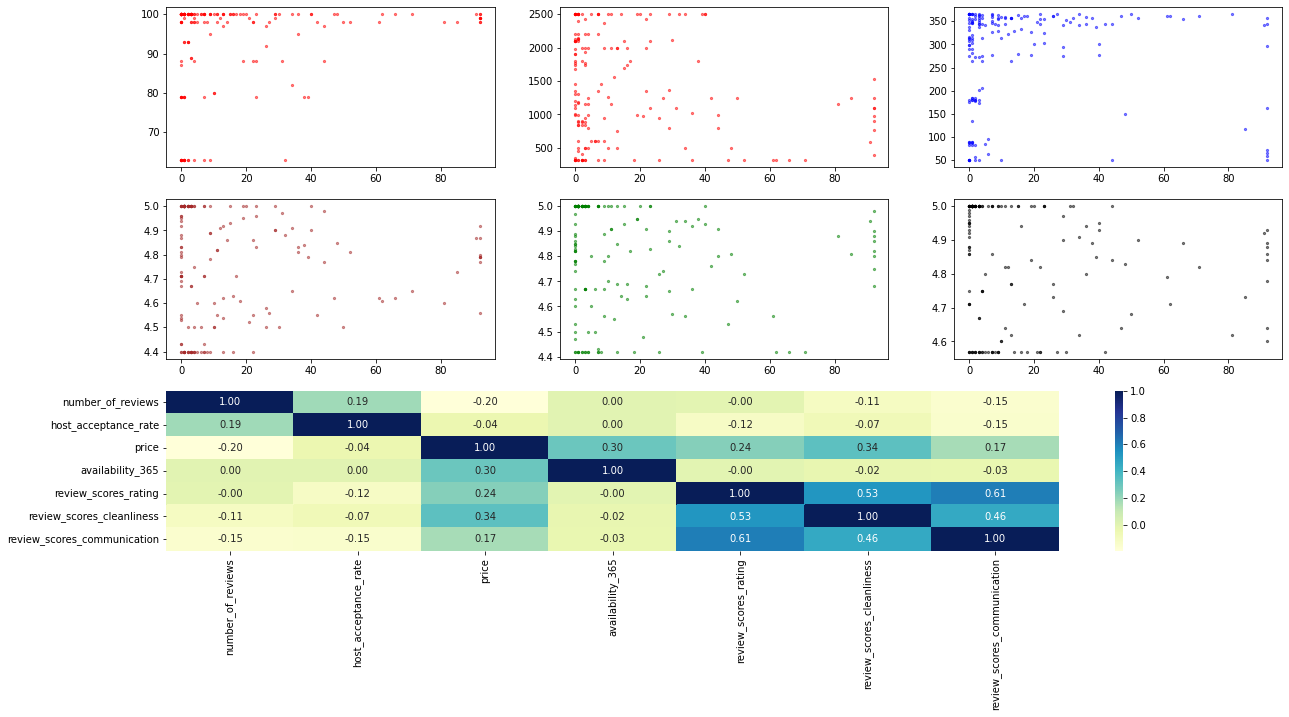

In [49]:
#Observamos las correlaciones para el tercer DF
print("PARA EL TIPO DE HABITACIÓN Hotel room OBSERVAMOS SUS GRÁFICAS:")
corrdf3 = correlaciones(df3)

PARA EL TIPO DE HABITACIÓN Shared room OBSERVAMOS SUS GRÁFICAS:
AxesSubplot(0.125,0.125;0.62x0.222059)


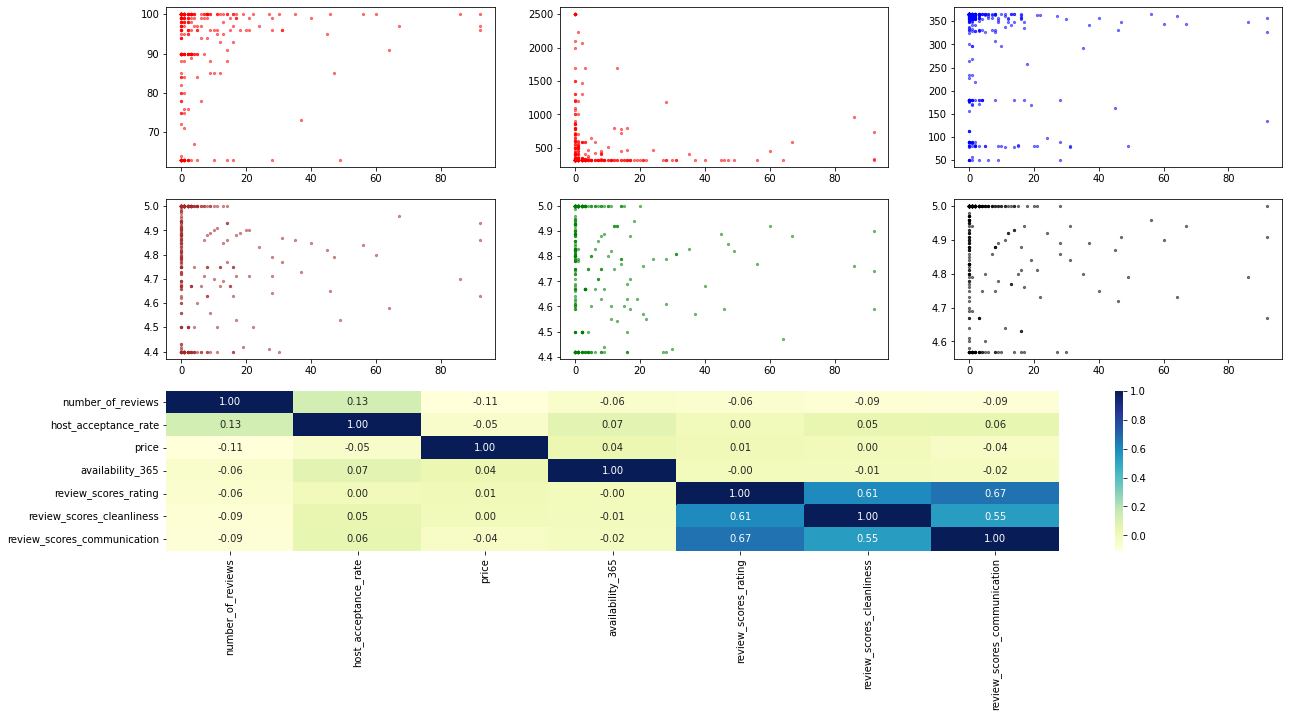

In [50]:
#Observamos las correlaciones para el último DF
print("PARA EL TIPO DE HABITACIÓN Shared room OBSERVAMOS SUS GRÁFICAS:")
corrdf4 = correlaciones(df4)

##5. Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento, utilizando la variable con mayor correlación.

In [51]:
def reglin(data):
  Vars_Indep= data[['number_of_reviews']]
  Var_Dep1= data['price']
  Var_Dep2= data['availability_365']
  Var_Dep3= data['review_scores_rating']
  Var_Dep4= data['review_scores_cleanliness']
  Var_Dep5= data['review_scores_communication']
  Var_Dep6= data[['host_acceptance_rate']]

  m1= LinearRegression()
  m2= LinearRegression()
  m3= LinearRegression()
  m4= LinearRegression()
  m5= LinearRegression()
  m6= LinearRegression()

  m1.fit(X=Vars_Indep, y=Var_Dep1)
  m2.fit(X=Vars_Indep, y=Var_Dep2)
  m3.fit(X=Vars_Indep, y=Var_Dep3)
  m4.fit(X=Vars_Indep, y=Var_Dep4)
  m5.fit(X=Vars_Indep, y=Var_Dep5)
  m6.fit(X=Vars_Indep, y=Var_Dep6)

  c1 = m1.score(Vars_Indep,Var_Dep1)
  c2 = m2.score(Vars_Indep,Var_Dep2)
  c3 = m3.score(Vars_Indep,Var_Dep3)
  c4 = m4.score(Vars_Indep,Var_Dep4)
  c5 = m5.score(Vars_Indep,Var_Dep5)
  c6 = m6.score(Vars_Indep,Var_Dep6)

  print("La precisión con price es de: ",c1)
  print("La precisión con availability_365 es de: ",c2)
  print("La precisión con review_scores_rating es de: ",c3)
  print("La precisión con review_scores_cleanliness es de: ",c4)
  print("La precisión con review_scores_communication es de: ",c5)
  print("La precisión con host_acceptance_rate es de: ",c6)

  return c1,c2,c3,c4,c5,c6

In [52]:
print("PARA EL TIPO DE HABITACIÓN Entire home/apt CON LA VARIABLE INDEPENDIENTE number_of_reviews ESTOS SON LOS RESULTADOS:")
c11,c12,c13,c14,c15,c16 = reglin(df1)

PARA EL TIPO DE HABITACIÓN Entire home/apt CON LA VARIABLE INDEPENDIENTE number_of_reviews ESTOS SON LOS RESULTADOS:
La precisión con price es de:  0.00827988132337909
La precisión con availability_365 es de:  0.007109586362224252
La precisión con review_scores_rating es de:  0.00019162330748589973
La precisión con review_scores_cleanliness es de:  8.476992552541862e-05
La precisión con review_scores_communication es de:  6.8199119955481e-05
La precisión con host_acceptance_rate es de:  0.0294646404028045


In [60]:
#Vemos que el mejor coeficiente de determinación es generado por la variable host_acceptance_rate
#Creamos el modelo matematic con esta variable y la dejamos guardada.
Vars_Indep1= df1[['number_of_reviews']]
Var_Dep1= df1[['host_acceptance_rate']]

modelo1= LinearRegression()
modelo1.fit(X=Vars_Indep1, y=Var_Dep1)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelo1.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.057039]]),
 '_residues': array([1551670.57757137]),
 'rank_': 1,
 'singular_': array([3805.1587105]),
 'intercept_': array([92.84163639])}

In [53]:
print("PARA EL TIPO DE HABITACIÓN Private room CON LA VARIABLE INDEPENDIENTE number_of_reviews ESTOS SON LOS RESULTADOS:")
c21,c22,c23,c24,c25,c26 = reglin(df2)

PARA EL TIPO DE HABITACIÓN Private room CON LA VARIABLE INDEPENDIENTE number_of_reviews ESTOS SON LOS RESULTADOS:
La precisión con price es de:  0.013717838246261937
La precisión con availability_365 es de:  0.007554391974769814
La precisión con review_scores_rating es de:  9.781966234245765e-05
La precisión con review_scores_cleanliness es de:  0.00020728610994880103
La precisión con review_scores_communication es de:  0.0009664180074349105
La precisión con host_acceptance_rate es de:  0.026127450433930277


In [61]:
#Vemos que el mejor coeficiente de determinación es generado por la variable host_acceptance_rate
#Creamos el modelo matematic con esta variable y la dejamos guardada.
Vars_Indep2= df2[['number_of_reviews']]
Var_Dep2= df2[['host_acceptance_rate']]

modelo2= LinearRegression()
modelo2.fit(X=Vars_Indep2, y=Var_Dep2)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelo2.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.08621995]]),
 '_residues': array([1547323.24186854]),
 'rank_': 1,
 'singular_': array([2363.0898087]),
 'intercept_': array([89.26331025])}

In [54]:
print("PARA EL TIPO DE HABITACIÓN Hotel room CON LA VARIABLE INDEPENDIENTE number_of_reviews ESTOS SON LOS RESULTADOS:")
c31,c32,c33,c34,c35,c36 = reglin(df3)

PARA EL TIPO DE HABITACIÓN Hotel room CON LA VARIABLE INDEPENDIENTE number_of_reviews ESTOS SON LOS RESULTADOS:
La precisión con price es de:  0.03825538202232759
La precisión con availability_365 es de:  5.892987732236676e-07
La precisión con review_scores_rating es de:  1.76963783402595e-05
La precisión con review_scores_cleanliness es de:  0.01221741887639416
La precisión con review_scores_communication es de:  0.02259762770920526
La precisión con host_acceptance_rate es de:  0.03431254885187851


In [62]:
#Vemos que el mejor coeficiente de determinación es generado por la variable price
#Creamos el modelo matematic con esta variable y la dejamos guardada.
Vars_Indep3= df3[['number_of_reviews']]
Var_Dep3= df3[['price']]

modelo3= LinearRegression()
modelo3.fit(X=Vars_Indep3, y=Var_Dep3)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelo3.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-6.16644262]]),
 '_residues': array([98702563.25287253]),
 'rank_': 1,
 'singular_': array([321.32603163]),
 'intercept_': array([1497.50464952])}

In [55]:
print("PARA EL TIPO DE HABITACIÓN Shared room CON LA VARIABLE INDEPENDIENTE number_of_reviews ESTOS SON LOS RESULTADOS:")
c41,c42,c43,c44,c45,c46 = reglin(df4)

PARA EL TIPO DE HABITACIÓN Shared room CON LA VARIABLE INDEPENDIENTE number_of_reviews ESTOS SON LOS RESULTADOS:
La precisión con price es de:  0.011166305025819168
La precisión con availability_365 es de:  0.003760112510299951
La precisión con review_scores_rating es de:  0.004212977594003076
La precisión con review_scores_cleanliness es de:  0.007788150850248199
La precisión con review_scores_communication es de:  0.007857314946959737
La precisión con host_acceptance_rate es de:  0.016942930300840153


In [63]:
#Vemos que el mejor coeficiente de determinación es generado por la variable host_acceptance_rate
#Creamos el modelo matematic con esta variable y la dejamos guardada.
Vars_Indep4= df4[['number_of_reviews']]
Var_Dep4= df4[['host_acceptance_rate']]

modelo4= LinearRegression()
modelo4.fit(X=Vars_Indep4, y=Var_Dep4)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelo4.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.12928436]]),
 '_residues': array([62961.34449344]),
 'rank_': 1,
 'singular_': array([254.79793622]),
 'intercept_': array([89.02470739])}

##6. Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de habitación.

In [56]:
print("PARA EL TIPO DE HABITACIÓN Entire home/apt SUS COEF DE CORRELACION Y DETERMINACIÓN SON:\n")
print("La precisión con price es de: ",c11)
print("La precisión con availability_365 es de: ",c12)
print("La precisión con review_scores_rating es de: ",c13)
print("La precisión con review_scores_cleanliness es de: ",c14)
print("La precisión con review_scores_communication es de: ",c15)
print("La precisión con host_acceptance_rate es de: ",c16)
corrdf1

PARA EL TIPO DE HABITACIÓN Entire home/apt SUS CORRELACIONES SON:

La precisión con price es de:  0.00827988132337909
La precisión con availability_365 es de:  0.007109586362224252
La precisión con review_scores_rating es de:  0.00019162330748589973
La precisión con review_scores_cleanliness es de:  8.476992552541862e-05
La precisión con review_scores_communication es de:  6.8199119955481e-05
La precisión con host_acceptance_rate es de:  0.0294646404028045


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.171653,-0.090994,-0.084318,-0.013843,-0.009207,-0.008258
host_acceptance_rate,0.171653,1.000000,0.024482,0.069458,0.006409,0.035364,-0.029180
price,-0.090994,0.024482,1.000000,0.044074,0.134237,0.128178,0.062643
availability_365,-0.084318,0.069458,0.044074,1.000000,-0.098610,-0.041747,-0.109719
review_scores_rating,-0.013843,0.006409,0.134237,-0.098610,1.000000,0.664276,0.647098
review_scores_cleanliness,-0.009207,0.035364,0.128178,-0.041747,0.664276,1.000000,0.500573
review_scores_communication,-0.008258,-0.029180,0.062643,-0.109719,0.647098,0.500573,1.000000


In [57]:
print("PARA EL TIPO DE HABITACIÓN Private room SUS COEF DE CORRELACION Y DETERMINACIÓN SON:\n")
print("La precisión con price es de: ",c21)
print("La precisión con availability_365 es de: ",c22)
print("La precisión con review_scores_rating es de: ",c23)
print("La precisión con review_scores_cleanliness es de: ",c24)
print("La precisión con review_scores_communication es de: ",c25)
print("La precisión con host_acceptance_rate es de: ",c26)
corrdf2

PARA EL TIPO DE HABITACIÓN Private room SUS CORRELACIONES SON:

La precisión con price es de:  0.013717838246261937
La precisión con availability_365 es de:  0.007554391974769814
La precisión con review_scores_rating es de:  9.781966234245765e-05
La precisión con review_scores_cleanliness es de:  0.00020728610994880103
La precisión con review_scores_communication es de:  0.0009664180074349105
La precisión con host_acceptance_rate es de:  0.026127450433930277


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.161640,-0.117123,-0.086916,-0.009890,-0.014397,-0.031087
host_acceptance_rate,0.161640,1.000000,0.068600,0.048549,-0.027871,-0.004845,-0.041642
price,-0.117123,0.068600,1.000000,0.125971,0.019188,0.078146,0.002244
availability_365,-0.086916,0.048549,0.125971,1.000000,-0.091416,-0.056810,-0.082773
review_scores_rating,-0.009890,-0.027871,0.019188,-0.091416,1.000000,0.666218,0.670519
review_scores_cleanliness,-0.014397,-0.004845,0.078146,-0.056810,0.666218,1.000000,0.534078
review_scores_communication,-0.031087,-0.041642,0.002244,-0.082773,0.670519,0.534078,1.000000


In [58]:
print("PARA EL TIPO DE HABITACIÓN Hotel room SUS COEF DE CORRELACION Y DETERMINACIÓN SON:\n")
print("La precisión con price es de: ",c31)
print("La precisión con availability_365 es de: ",c32)
print("La precisión con review_scores_rating es de: ",c33)
print("La precisión con review_scores_cleanliness es de: ",c34)
print("La precisión con review_scores_communication es de: ",c35)
print("La precisión con host_acceptance_rate es de: ",c36)
corrdf3

PARA EL TIPO DE HABITACIÓN Hotel room SUS CORRELACIONES SON:

La precisión con price es de:  0.03825538202232759
La precisión con availability_365 es de:  5.892987732236676e-07
La precisión con review_scores_rating es de:  1.76963783402595e-05
La precisión con review_scores_cleanliness es de:  0.01221741887639416
La precisión con review_scores_communication es de:  0.02259762770920526
La precisión con host_acceptance_rate es de:  0.03431254885187851


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.185236,-0.195590,0.000768,-0.004207,-0.110532,-0.150325
host_acceptance_rate,0.185236,1.000000,-0.039144,0.004365,-0.117531,-0.069810,-0.147993
price,-0.195590,-0.039144,1.000000,0.303853,0.239097,0.336659,0.170577
availability_365,0.000768,0.004365,0.303853,1.000000,-0.000440,-0.024938,-0.028350
review_scores_rating,-0.004207,-0.117531,0.239097,-0.000440,1.000000,0.532254,0.605683
review_scores_cleanliness,-0.110532,-0.069810,0.336659,-0.024938,0.532254,1.000000,0.457004
review_scores_communication,-0.150325,-0.147993,0.170577,-0.028350,0.605683,0.457004,1.000000


In [59]:
print("PARA EL TIPO DE HABITACIÓN Shared room SUS COEF DE CORRELACION Y DETERMINACIÓN SON:\n")
print("La precisión con price es de: ",c41)
print("La precisión con availability_365 es de: ",c42)
print("La precisión con review_scores_rating es de: ",c43)
print("La precisión con review_scores_cleanliness es de: ",c44)
print("La precisión con review_scores_communication es de: ",c45)
print("La precisión con host_acceptance_rate es de: ",c46)
corrdf4

PARA EL TIPO DE HABITACIÓN Shared room SUS CORRELACIONES SON:

La precisión con price es de:  0.011166305025819168
La precisión con availability_365 es de:  0.003760112510299951
La precisión con review_scores_rating es de:  0.004212977594003076
La precisión con review_scores_cleanliness es de:  0.007788150850248199
La precisión con review_scores_communication es de:  0.007857314946959737
La precisión con host_acceptance_rate es de:  0.016942930300840153


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
number_of_reviews,1.000000,0.130165,-0.105671,-0.061320,-0.064907,-0.088251,-0.088641
host_acceptance_rate,0.130165,1.000000,-0.049659,0.067915,0.003528,0.053835,0.056434
price,-0.105671,-0.049659,1.000000,0.039620,0.014201,0.002760,-0.042689
availability_365,-0.061320,0.067915,0.039620,1.000000,-0.002624,-0.007421,-0.019359
review_scores_rating,-0.064907,0.003528,0.014201,-0.002624,1.000000,0.606220,0.669519
review_scores_cleanliness,-0.088251,0.053835,0.002760,-0.007421,0.606220,1.000000,0.545073
review_scores_communication,-0.088641,0.056434,-0.042689,-0.019359,0.669519,0.545073,1.000000


##7. Crear los archivos requeridos en Google Colab y respaldarlos en GitHub.

##8. Implementar el mismo análisis para 2 ciudades de tu elección

##9. Generar un reporte comparativo sobre el comportamiento de las ciudades elegidas respecto al D.F.

Observamos que para el caso de los datos en México, la separación por habitación queda de la siguiente manera: 

1 - Chicago
2 - Singapur

##10. Subir el link del repositorio en CANVAS para “Evaluación”